In [9]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

Suppose we are interested in whether 

* John
* Jane
* Johnny
* Janie

Will order takeaway for dinner tonight - 

Let us try to build a simple neural network (by hand) to answer these questions!

----


John only orders delivery when it is raining and he has no car

| Raining? | No Car?    | Orders Delivery |
|----------|------------|-----------------|
|  yes     | yes        | yes             |
|  yes     | no         | no              |
|  no      | yes        | no              |
|  no      | no         | no              |


Jane on the other hand will order delivery if it is raining or she has no car


| Raining? | No Car?    | Orders Delivery |
|----------|------------|-----------------|
|  yes     | yes        | yes             |
|  yes     | no         | yes             |
|  no      | yes        | yes             |
|  no      | no         | no              |

Johnny always orders delivery when there is no car.

| Raining? | No Car?    | Orders Delivery |
|----------|------------|-----------------|
|  yes     | yes        | yes             |
|  yes     | no         | no              |
|  no      | yes        | yes             |
|  no      | no         | no              |

Janie orders delivery when it is raining or has no car, but not when both events happen

| Raining? | No Car?    | Orders Delivery |
|----------|------------|-----------------|
|  yes     | yes        | no              |
|  yes     | no         | yes             |
|  no      | yes        | yes             |
|  no      | no         | no              |

----

If we convert it to numbers so that we can graph it it would look like:

John only orders delivery when it is raining and he has no car

| Raining? | No  Car?   | Orders Delivery |
|----------|------------|-----------------|
|  1       | 1          | 1               |
|  1       | 0          | 0               |
|  0       | 1          | 0               |
|  0       | 0          | 0               |


Jane on the other hand will order delivery if it is raining or she has no car


| Raining? | No Car?    | Orders Delivery |
|----------|------------|-----------------|
|  1       | 1          | 1               |
|  1       | 0          | 1               |
|  0       | 1          | 1               |
|  0       | 0          | 0               |

Johnny always orders delivery when there is no car.

| Raining? | No Car?    | Orders Delivery |
|----------|------------|-----------------|
|  1       | 1          | 1               |
|  1       | 0          | 0               |
|  0       | 1          | 1               |
|  0       | 0          | 0               |

Janie orders delivery when it is raining or has no car, but not when both events happen

| Raining? | No  Car?   | Orders Delivery |
|----------|------------|-----------------|
|  1       | 1          | 0               |
|  1       | 0          | 1               |
|  0       | 1          | 1               |
|  0       | 0          | 0               |

In [10]:
# lets plot these points

import pandas as pd
import numpy as np

scenario = pd.DataFrame({
    'is_rain':[1,1,0,0],
    'no_car': [1,0,1,0]
})

scenario

,is_rain,no_car
0,1,1
1,1,0
2,0,1
3,0,0


In [11]:
orders_delivery = {
    'john': [1,0,0,0],
    'jane': [1,1,1,0], 
    'johnny': [1,0,1,0], 
    'janie': [0,1,1,0]    
}


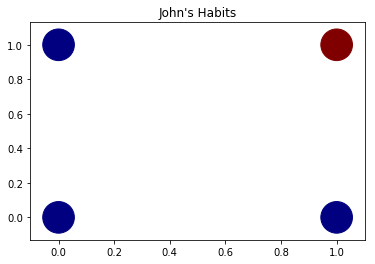

In [12]:
plt.scatter(scenario['is_rain'], scenario['no_car'], c=orders_delivery['john'], cmap='jet', s=1000)
plt.title("John's Habits")

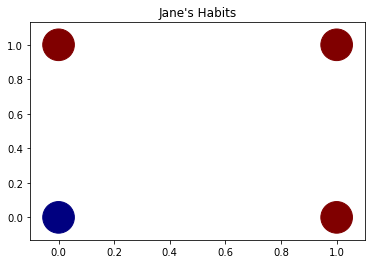

In [13]:
plt.scatter(scenario['is_rain'], scenario['no_car'], c=orders_delivery['jane'], cmap='jet', s=1000)
plt.title("Jane's Habits")

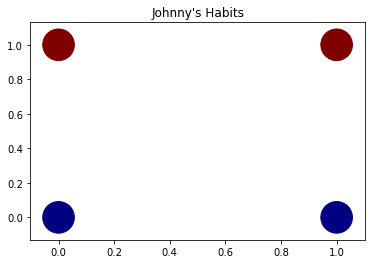

In [14]:
plt.scatter(scenario['is_rain'], scenario['no_car'], c=orders_delivery['johnny'], cmap='jet', s=1000)
plt.title("Johnny's Habits")

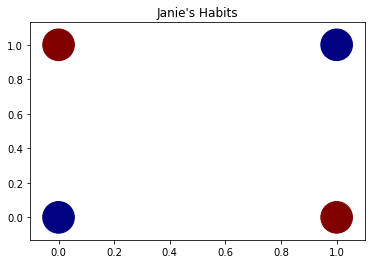

In [15]:
plt.scatter(scenario['is_rain'], scenario['no_car'], c=orders_delivery['janie'], cmap='jet', s=1000)
plt.title("Janie's Habits")

The goal is to learn a function that takes in `scenario`, and outputs some number which can tell us whether:

*  Getting Delivery: (return `1`)
*  Not Getting Delivery: (return `0`)



![nnet](diagram1.png)

In [65]:
def basic_nnet(X, weights, mode='prediction', add_ones=True):
    """
    X is input
    weights is the wieghts for the input
    bias is the bias component
    """
    # add our vector of ones
    if add_ones:
        X = np.hstack([X, np.ones((X.shape[0], 1))])
    
    raw_output = X.dot(np.array(weights))
    if mode == 'prediction':
        return (raw_output > 0) * 1
    else:
        return raw_output

In [17]:
weights = [0.5,0.5,-0.6]
john_scen = scenario.copy()
john_scen['prediction'] = basic_nnet(scenario, weights)
john_scen

,is_rain,no_car,prediction
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


In [18]:
def prediction_region(weights, response):
    cdict = {'red':   ((0.0, 0.7, 0.7),
                   (1.0, 1.0, 1.0)),
         'green': ((0.0, 0.9, 0.9),
                   (1.0, 0.9, 0.9)),
         'blue':  ((0.0, 1.0, 1.0),
                   (1.0, 0.9, 1.0))}
    LightRdBu = matplotlib.colors.LinearSegmentedColormap('LightRdBu', cdict)
    # do a special plot to view what things look like...
    # https://matplotlib.org/examples/pylab_examples/pcolor_demo.html
    dd = 0.05
    y, x = np.mgrid[slice(-1, 1.5 + dd, dd),
                    slice(-1, 1.5 + dd, dd)]
    z = (np.array((x*weights[0] + y*weights[1] + weights[2]))>0)*1
    # x and y are bounds, so z should be the value *inside* those bounds.
    # Therefore, remove the last value from the z array.
    z = z[:-1, :-1]    
    
    plt.pcolor(x, y, z, cmap=LightRdBu, vmin=0, vmax=1)
    plt.axis([-.1, 1.1, -0.1, 1.1])
    plt.title("Prediction Region")
    plt.scatter(scenario['is_rain'], scenario['no_car'], c=response, cmap='jet', s=250)
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\chapm\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

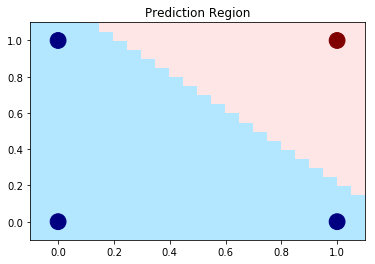

In [19]:
prediction_region([0.5,0.5,-0.6], orders_delivery['john'])

<module 'matplotlib.pyplot' from 'c:\\users\\chapm\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

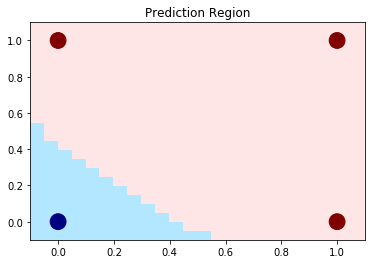

In [20]:
prediction_region([0.5,0.5,-0.2], orders_delivery['jane'])

<module 'matplotlib.pyplot' from 'c:\\users\\chapm\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

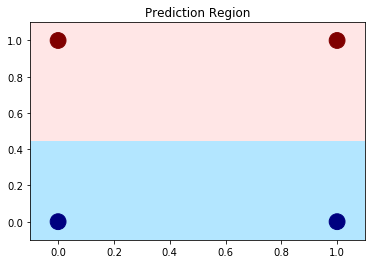

In [21]:
prediction_region([0.0,0.7,-0.3], orders_delivery['johnny'])

<module 'matplotlib.pyplot' from 'c:\\users\\chapm\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

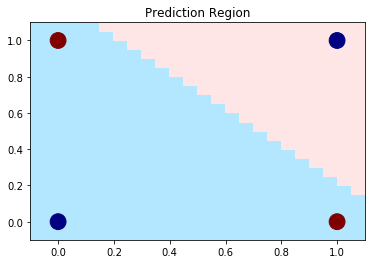

In [22]:
# impossible!
prediction_region([0.5,0.5,-0.6], orders_delivery['janie'])

We can do this with adding a hidden layer (and lets make use of a activation function)

![img](diagram2.png)

In [70]:
def activation_relu(x):
    # relu activation function
    return np.maximum(x, 0)

In [141]:
layer1 = basic_nnet(scenario, np.array([[-1, 2, -1], 
          [2, -1, -1]]).T, mode='raw')
layer1

array([[ 0.,  0.],
       [-2.,  1.],
       [ 1., -2.],
       [-1., -1.]])

In [142]:
layer1_relu = activation_relu(layer1)
layer1_relu

array([[ 0.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  0.]])

In [143]:
layer2 = basic_nnet(layer1_relu, np.array([1,1]), add_ones=False, mode='raw')
layer2

array([ 0.,  1.,  1.,  0.])

In [146]:
def prediction_xor(model_func, response):
    cdict = {'red':   ((0.0, 0.7, 0.7),
                   (1.0, 1.0, 1.0)),
         'green': ((0.0, 0.9, 0.9),
                   (1.0, 0.9, 0.9)),
         'blue':  ((0.0, 1.0, 1.0),
                   (1.0, 0.9, 1.0))}
    LightRdBu = matplotlib.colors.LinearSegmentedColormap('LightRdBu', cdict)
    # do a special plot to view what things look like...
    # https://matplotlib.org/examples/pylab_examples/pcolor_demo.html
    dd = 0.05
    yy, xx = np.mgrid[slice(-1, 1.5 + dd, dd),
                    slice(-1, 1.5 + dd, dd)]
    
    z = np.zeros(xx.shape)
    for index, _ in np.ndenumerate(xx):
        z[index] = model_func(np.array([[yy[index], xx[index]]]))[0]
    #z = (np.array((x*weights[0] + y*weights[1] + weights[2]))>0)*1
    # x and y are bounds, so z should be the value *inside* those bounds.
    # Therefore, remove the last value from the z array.
    z = z[:-1, :-1]    
    
    plt.pcolor(xx, yy, z, cmap=LightRdBu, vmin=0, vmax=1)
    plt.axis([-.1, 1.1, -0.1, 1.1])
    plt.title("Prediction Region")
    plt.scatter(scenario['is_rain'], scenario['no_car'], c=response, cmap='jet', s=250)
    return plt

In [147]:
# putting it altogether
def janie_model(X):
    weights1 = np.array([[-1, 2, -1], 
          [2, -1, -1]]).T
    weights2 = np.array([1,1])
    
    # showing how a neural network scores    
    layer1 = basic_nnet(scenario, weights1, mode='raw')    
    layer1_relu = activation_relu(layer1)
    layer2 = basic_nnet(layer1_relu, np.array([1,1]), add_ones=False, mode='raw')
    # return layer2
    
    # we can also see that it can be simply a composition of functions!    
    return basic_nnet(
        activation_relu(
        # layer 1
        (basic_nnet(X, 
          np.array([[-1, 2, -1], 
          [2, -1, -1]]).T, mode='raw'))
        ), np.array([1,1]), add_ones=False, mode='raw')



<module 'matplotlib.pyplot' from 'c:\\users\\chapm\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

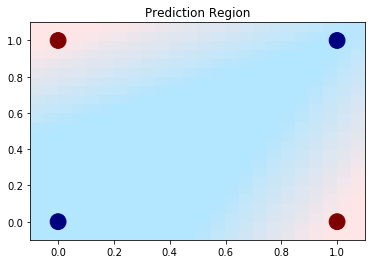

In [148]:
prediction_xor(janie_model, orders_delivery['janie'])